In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

## 코스피 종목코드 수집

In [2]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://gist.githubusercontent.com/allieus/733725662c644ab56c9db9d3cdf77ed1/raw/1c8bda399d98240fc02b97120cafa1ec7fd70f70/kospi.csv", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [3]:
kospi_series = kospi_df['종목코드']
kospi_series.head()

종목명
미원에스씨     268280
경동도시가스    267290
넷마블게임즈    251270
아이엔지생명    079440
현대건설기계    267270
Name: 종목코드, dtype: object

## 종목별 실시간 시세 시각화

In [4]:
code = kospi_series['삼성전자']
삼성전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['LG전자']
LG전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

In [5]:
print(삼성전자_volume_df.shape)
삼성전자_volume_df.head()

(200, 6)


,체결가,전일비,매도,매수,거래량,변동량
체결시각,,,,,,
2020-04-29 15:58:00,50000.0,100.0,50000.0,49950.0,15558147.0,1168.0
2020-04-29 15:57:00,50000.0,100.0,50000.0,49950.0,15556979.0,229.0
2020-04-29 15:56:00,50000.0,100.0,50000.0,49950.0,15556750.0,1386.0
2020-04-29 15:55:00,50000.0,100.0,50000.0,49950.0,15555364.0,384.0
2020-04-29 15:54:00,50000.0,100.0,50000.0,49950.0,15554980.0,3432.0


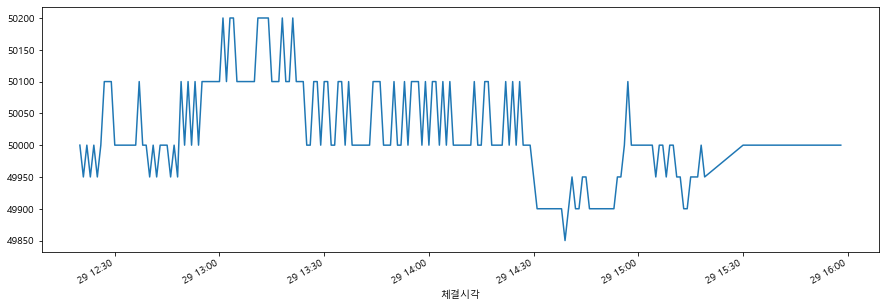

In [6]:
삼성전자_volume_df['체결가'].plot(figsize=(15, 5))

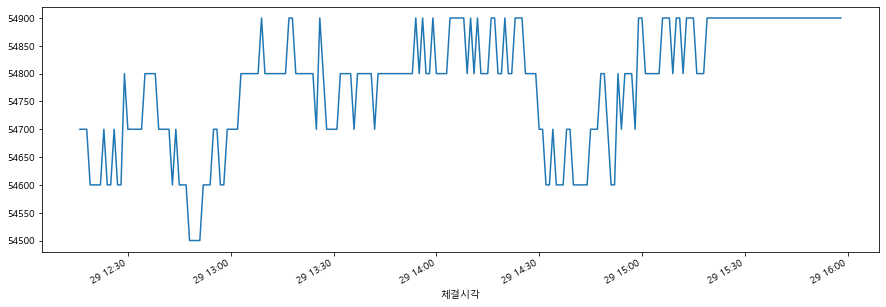

In [9]:
LG전자_volume_df['체결가'].plot(figsize=(15, 5))

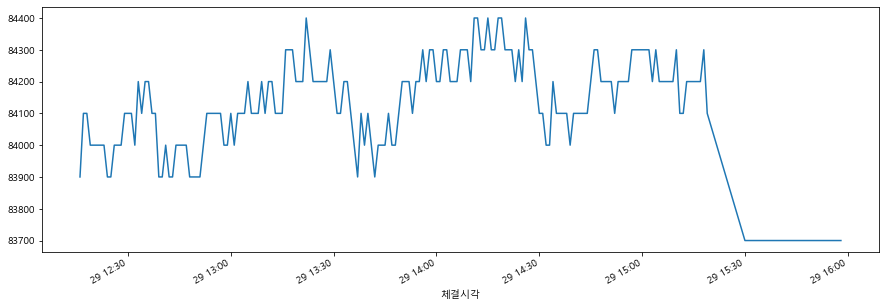

In [10]:
SK하이닉스_volume_df['체결가'].plot(figsize=(15, 5))

## 하나의 DataFrame으로 처리

In [11]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})

start_ts = df.iloc[0].name
end_ts = df.iloc[-1].name

print(start_ts, '~', end_ts)

print(df.shape)
df.head()

2020-04-29 12:16:00 ~ 2020-04-29 15:58:00
(204, 3)


,삼성전자,LG전자,SK하이닉스
체결시각,,,
2020-04-29 12:16:00,NaN,54700.0,83900.0
2020-04-29 12:17:00,NaN,54700.0,84100.0
2020-04-29 12:18:00,NaN,54700.0,84100.0
2020-04-29 12:19:00,NaN,54600.0,84000.0
2020-04-29 12:20:00,50000.0,54600.0,84000.0


## 체결가 시각화

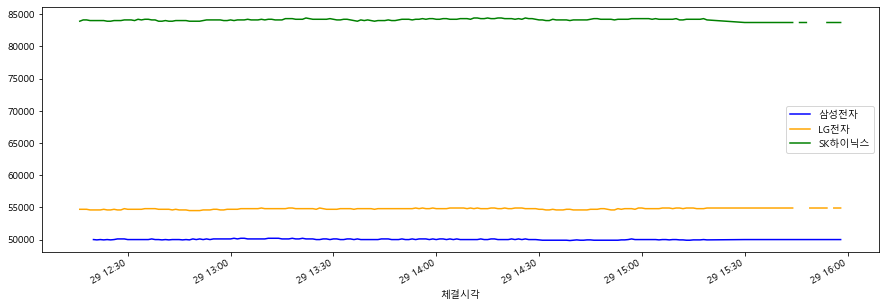

In [13]:
ax = df.plot(figsize=(15, 5), color=['blue', 'orange', 'green'])

In [14]:
df2 = pd.DataFrame({
#     '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})
print(df2.shape)
df2.head()

(203, 2)


,LG전자,SK하이닉스
체결시각,,
2020-04-29 12:16:00,54700.0,83900.0
2020-04-29 12:17:00,54700.0,84100.0
2020-04-29 12:18:00,54700.0,84100.0
2020-04-29 12:19:00,54600.0,84000.0
2020-04-29 12:20:00,54600.0,84000.0


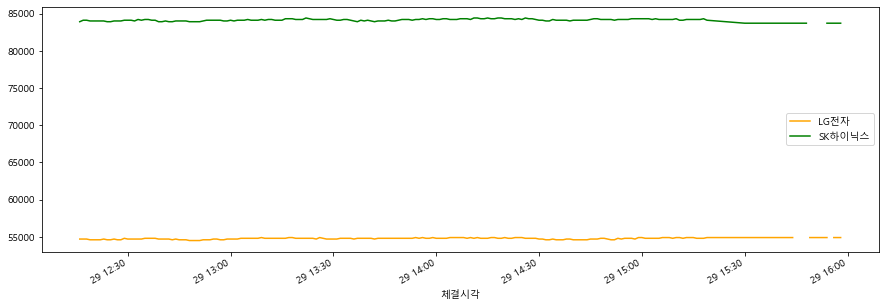

In [15]:
df2.plot(figsize=(15, 5), color=['orange', 'green'])